 # Who are the Bossy Words?

 On this activity you will use TF-IDF to find the most relevant words on news articles that talk about money in the [Reuters Corpus](https://www.nltk.org/book/ch02.html#reuters-corpus) bundled in `NLTK`. Once you find the most relevant words, you should create a word cloud.

In [1]:
# initial imports
import nltk
from nltk.corpus import reuters
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

plt.style.use("seaborn-whitegrid")
mpl.rcParams["figure.figsize"] = [20.0, 10.0]


 ## Loading the Reuters Corpus

 The first step is to load the Reuters Corpus.

In [2]:
# Download/update the Reuters dataset
nltk.download("reuters")


[nltk_data] Downloading package reuters to
[nltk_data]     /Users/akanksha/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

 ## Getting the News About Money

 You will analyze only news that talk about _money_. There are two categories on the Reuters Corpus that talk about money: `money-fx` and `money-supply`. In this section, you will filter the news by these categories.

 Take a look into the [Reuters Corpus documentation](https://www.nltk.org/book/ch02.html#reuters-corpus) and check how you can retrieve the categories of a document using the `reuters.categories()` method; write some lines of code to retrieve all the news articles that are under the `money-fx` or the `money-supply` categories.

 **Hint:**
 You can use a comprehension list or a for-loop to accomplish this task.

In [6]:
# Getting all documents ids under the money-fx and money-supply categories
categories = ["money-fx", "money-supply"]
all_docs_id = reuters.fileids(categories=categories)

In [8]:
# Creating the working corpus containing the text from all the news articles about money
corpus = [reuters.raw(doc) for doc in all_docs_id]
# Printing a sample article
corpus[45]

'U.S. BANK NET FREE RESERVES 447 MLN DLRS IN TWO WEEKS TO APRIL 8\n\n  U.S. BANK NET FREE RESERVES 447 MLN DLRS IN TWO WEEKS TO APRIL 8\n  \n\n'

 ## Calculating the TF-IDF Weights

 Calculate the TF-IDF weight for each word on the working corpus using the `TfidfVectorizer()` class. Remember to include the `stop_words='english'` parameter.

In [9]:
# Calculating TF-IDF for the working corpus.
vectorizer = TfidfVectorizer(stop_words="english")
X_corpus = vectorizer.fit_transform(corpus)


 Create a DataFrame representation of the TF-IDF weights of each term in the working corpus. Use the `sum(axis=0)` method to calculate a measure similar to the term frequency based on the TF-IDF weight, this value will be used to rank the terms for the word cloud creation.

In [28]:
# Creating a DataFrame Representation of the TF-IDF results
money_news_df = pd.DataFrame(
    {
        'Word': vectorizer.get_feature_names(),
        'Frequency':np.ravel(X_corpus.sum(axis=0))
    }
)
# Order the DataFrame by word frequency in descending order
money_news_df = money_news_df.sort_values(by = ['Frequency'], ascending=False)
# Print the top 10 words
money_news_df.head(10)

/Users/akanksha/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word,Frequency
5876,said,54.918051
4424,mln,51.533825
1252,bank,49.568996
6397,stg,47.236863
1353,billion,43.544274
4880,pct,41.917193
2461,dollar,37.178790
2939,fed,36.860352
2452,dlrs,36.273205
4265,market,35.086673


 ## Retrieving the Top Words

 In order to create the word cloud you should get the top words, in this case we will use a thumb rule that has been empirically tested by some NLP experts that states that words with a frequency between 10 and 30 might be the most relevant in a corpus.

 Following this rule, create a new DataFrame containing only those words with the mentioned frequency.

In [32]:
# Top words will be those with a frequency between 10 ans 30 (thumb rule)
top_words = money_news_df.loc[(money_news_df['Frequency']>=10) & (money_news_df['Frequency']<=30)]

top_words.head(10)


,Word,Frequency
7324,yen,28.343276
5913,says,26.248262
3844,japan,23.927655
2783,exchange,22.504089
2158,dealers,22.503656
5365,rate,21.277388
7203,week,20.247803
5366,rates,19.969733
1620,central,18.079040
2105,currency,17.370210


 ## Creating Word Cloud

 Now you have all the pieces needed to create a word cloud based on TF-IDF weights, so use the `WordCloud` library to create it.

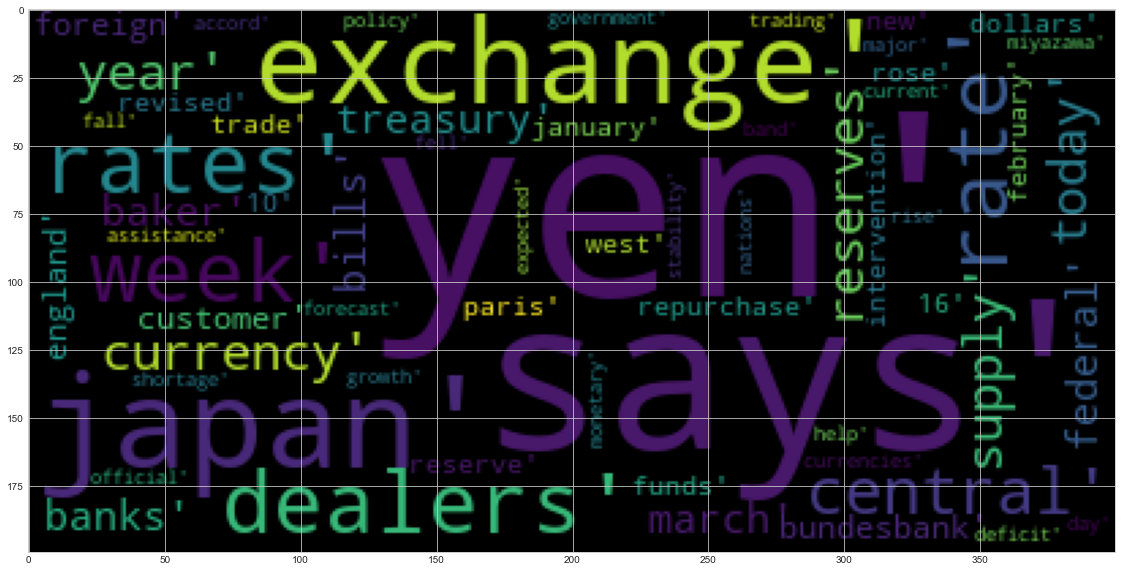

In [35]:
# Create a string list of terms to generate the word cloud
terms_list = str(top_words["Word"].tolist())

# Create the word cloud
wc = WordCloud().generate(terms_list)
plt.imshow(wc)


 ## Challenge: Looking for Documents that Contains Top Words

 Finally you might find interesting to search those articles that contain the most relevant words. Create a function called `retrieve_docs(terms)` that receive a list of terms as parameter and extract from the working corpus all those news articles that contains the search terms. On this function you should use the `reuters.words()` method to retrieve the tokenized version of each article as can be seen on the [Reuters Corpus documentation](https://www.nltk.org/book/ch02.html#reuters-corpus).

 **Hint:** To find any occurrence of the search terms you might find quite useful [this post on StackOverflow](https://stackoverflow.com/a/25102099/4325668), also you should lower case all the words to ease your terms search.

In [ ]:
def retrieve_docs(terms):



 ### Question 1: How many articles talk about Yen?

In [ ]:
len(retrieve_docs(["yen"]))


### Question 2: How many articles talk about Japan or Banks?

In [ ]:
len(retrieve_docs(["japan", "banks"]))


 ### Question 3: How many articles talk about England or Dealers?

In [ ]:
len(retrieve_docs(["england", "dealers"]))
